# LetsGrowMore - DataScience Task 3

# Music Recommendation

# Fashad Ahmed Siddique

Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
train   =   pd.read_csv('train.csv')
test    =   pd.read_csv('test.csv')
members =   pd.read_csv('members.csv')
songs   =   pd.read_csv('songs.csv')

In [4]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [5]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [6]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [7]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [8]:
train = train.sample(frac=0.01)

In [9]:
train = pd.merge(train, songs, on='song_id', how='left')

In [10]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,Aqo7vykejqU1MqpE6JvAgfds/JeI2z1xAY0XEXXywpE=,fEPejvpa8DZFOxZE1i0vlk7EEuVyuVHp/IIXaB2OGYc=,discover,Online playlist more,online-playlist,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1pt/N+lSVDDJDdyVLTxnoQph8HrDJA0La6ttZcaZE1M=,uWREia5CNSoapbU9+BpqQxlSfntw1J/01HQGpVxFiM4=,my library,Album more,album,1.0,283898.0,NaN,曾沛慈 (Pets Tseng),鴉片丹,黃婷,3.0
2,Hjaamz8gAiab26IZAxGJFR7YVexn2Mep9x+5gBV9i3g=,eC5Sod43v4fi2vi+F8CJ2+jSi+rp+sZSJQMWbNo/OLk=,my library,Local playlist more,local-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,bD06tV4tzZsS/2wqqDIOt8zmoAQ7IV+VJc8UGPxQTJ4=,0PSoBhrpfwF09qQKvTiItwZNPjOuyL0uoTazKevG8ls=,my library,Local playlist more,local-library,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,w8lMQ9t/toEY+/cKrSN+BkRasE9FUFv5QmSwP2c4XB8=,4D8+8aOmhZyFcSEZCoFIE/e1deh9yf8ONZN99tlcDAY=,my library,Local playlist more,local-library,1.0,186984.0,465,Bruno Mars,NaN,NaN,52.0


In [12]:
train = pd.merge(train, members, on='msno', how='left')
train.shape

(625, 24)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 624
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   msno                      625 non-null    object 
 1   song_id                   625 non-null    object 
 2   source_system_tab         625 non-null    object 
 3   source_screen_name        603 non-null    object 
 4   source_type               625 non-null    object 
 5   target                    625 non-null    float64
 6   song_length               204 non-null    float64
 7   genre_ids                 201 non-null    object 
 8   artist_name               204 non-null    object 
 9   composer                  164 non-null    object 
 10  lyricist                  128 non-null    object 
 11  language                  204 non-null    float64
 12  city_x                    625 non-null    int64  
 13  bd_x                      625 non-null    int64  
 14  gender_x  

In [18]:
np.mean(train.target)

0.7648

In [22]:
null_check = train.isnull()

In [24]:
print((null_check.sum()/null_check.count())*100)

msno                         0.00
song_id                      0.00
source_system_tab            0.00
source_screen_name           3.52
source_type                  0.00
target                       0.00
song_length                 67.36
genre_ids                   67.84
artist_name                 67.36
composer                    73.76
lyricist                    79.52
language                    67.36
city_x                       0.00
bd_x                         0.00
gender_x                    37.76
registered_via_x             0.00
registration_init_time_x     0.00
expiration_date_x            0.00
city_y                       0.00
bd_y                         0.00
gender_y                    37.76
registered_via_y             0.00
registration_init_time_y     0.00
expiration_date_y            0.00
dtype: float64


In [25]:
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()] = 'unknown'
    
train = train.fillna(value=0)

In [26]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city_x,bd_x,gender_x,registered_via_x,registration_init_time_x,expiration_date_x,city_y,bd_y,gender_y,registered_via_y,registration_init_time_y,expiration_date_y
0,Aqo7vykejqU1MqpE6JvAgfds/JeI2z1xAY0XEXXywpE=,fEPejvpa8DZFOxZE1i0vlk7EEuVyuVHp/IIXaB2OGYc=,discover,Online playlist more,online-playlist,0.0,0.0,unknown,unknown,unknown,unknown,0.0,13,34,male,7,20111002,20170930,13,34,male,7,20111002,20170930
1,1pt/N+lSVDDJDdyVLTxnoQph8HrDJA0La6ttZcaZE1M=,uWREia5CNSoapbU9+BpqQxlSfntw1J/01HQGpVxFiM4=,my library,Album more,album,1.0,283898.0,unknown,曾沛慈 (Pets Tseng),鴉片丹,黃婷,3.0,5,24,female,7,20150602,20170911,5,24,female,7,20150602,20170911
2,Hjaamz8gAiab26IZAxGJFR7YVexn2Mep9x+5gBV9i3g=,eC5Sod43v4fi2vi+F8CJ2+jSi+rp+sZSJQMWbNo/OLk=,my library,Local playlist more,local-playlist,1.0,0.0,unknown,unknown,unknown,unknown,0.0,1,0,unknown,7,20120106,20171006,1,0,unknown,7,20120106,20171006
3,bD06tV4tzZsS/2wqqDIOt8zmoAQ7IV+VJc8UGPxQTJ4=,0PSoBhrpfwF09qQKvTiItwZNPjOuyL0uoTazKevG8ls=,my library,Local playlist more,local-library,1.0,0.0,unknown,unknown,unknown,unknown,0.0,1,0,unknown,7,20150718,20180128,1,0,unknown,7,20150718,20180128
4,w8lMQ9t/toEY+/cKrSN+BkRasE9FUFv5QmSwP2c4XB8=,4D8+8aOmhZyFcSEZCoFIE/e1deh9yf8ONZN99tlcDAY=,my library,Local playlist more,local-library,1.0,186984.0,465,Bruno Mars,unknown,unknown,52.0,1,0,unknown,7,20110116,20170916,1,0,unknown,7,20110116,20170916


In [28]:
train['registration_init_time_y'] = train['registration_init_time_y'].astype('category')
train['expiration_date_y'] = train['expiration_date_y'].astype('category')

In [29]:
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')

In [30]:
for i in train.select_dtypes(include=['category']).columns:
    train[i] = train[i].cat.codes

In [31]:
from sklearn.model_selection import train_test_split

In [36]:
X_train = train.drop(['target'], axis = 1).values
y_train = train['target'].values

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.30)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=250)

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
rfc_pred = rfc.predict(X_test)

In [44]:
print(confusion_matrix(y_test,rfc_pred))

[[  8  45]
 [  6 129]]


In [45]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.15      0.24        53
         1.0       0.74      0.96      0.83       135

    accuracy                           0.73       188
   macro avg       0.66      0.55      0.54       188
weighted avg       0.69      0.73      0.67       188



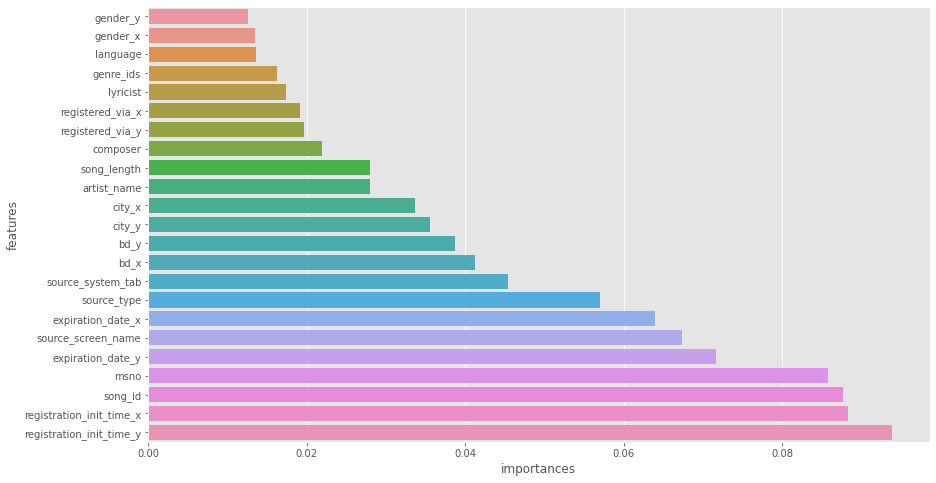

In [50]:
train_plot = pd.DataFrame({'features': train.columns[train.columns != 'target'],
                        'importances': rfc.feature_importances_})
train_plot = train_plot.sort_values('importances', ascending=True)

plt.figure(figsize=[14,8])
sns.barplot(x = train_plot.importances, y = train_plot.features)
plt.show()